<a href="https://colab.research.google.com/github/Nubiancodingdelight/ACS-Project-Repository-/blob/main/CNN_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounts google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#set path
%cd /content/drive/MyDrive/ACS_Research/VISDB_Data/

/content/drive/MyDrive/ACS_Research/VISDB_Data


In [ ]:
#imports
import numpy as np
import subprocess
import shlex
import re
import tensorflow as tf
import re
import math
import statistics as stat
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Prepare Matrix Data

## Matrix Method 1

In [ ]:
%cd /content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HBV/Experiment_1/

/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HBV/Experiment_1


In [ ]:
# prompt: load numpy data and label files and concatenate them from the following path /content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HBV/Experiment_1

import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HBV/Experiment_1/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_hbv_1 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_hbv_1 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_hbv_1.shape)
print("Concatenated labels shape:", concatenated_labels_hbv_1.shape)


Concatenated data shape: (1424, 2000, 4)
Concatenated labels shape: (1424,)


In [ ]:
#HPV

import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HPV/Experiment_1/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]


for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_hpv_1 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_hpv_1 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_hpv_1.shape)
print("Concatenated labels shape:", concatenated_data_hpv_1.shape)


Concatenated data shape: (1578, 2000, 4)
Concatenated labels shape: (1578, 2000, 4)


In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/References/Experiment_1/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_ref_1 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_ref_1 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_ref_1.shape)
print("Concatenated labels shape:", concatenated_labels_ref_1.shape)

Concatenated data shape: (1584, 2000, 4)
Concatenated labels shape: (1584,)


In [ ]:
concatenated_data_1 = np.concatenate((concatenated_data_hbv_1, concatenated_data_hpv_1, concatenated_data_ref_1), axis=0)
concatenated_labels_1 = np.concatenate((concatenated_labels_hbv_1, concatenated_labels_hpv_1, concatenated_labels_ref_1), axis=0)

print("Combined concatenated data shape:", concatenated_data_1.shape)
print("Combined concatenated labels shape:", concatenated_labels_1.shape)



Combined concatenated data shape: (4586, 2000, 4)
Combined concatenated labels shape: (4586,)


In [ ]:
#split numpy arrays intro train and test

from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(concatenated_data_1, concatenated_labels_1, test_size=0.2, random_state=42)

print("Training data shape:", X_train_1.shape)
print("Testing data shape:", X_test_1.shape)
print("Training labels shape:", y_train_1.shape)
print("Testing labels shape:", y_test_1.shape)


Training data shape: (3668, 2000, 4)
Testing data shape: (918, 2000, 4)
Training labels shape: (3668,)
Testing labels shape: (918,)


##Matrix Method 2

In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HBV/Experiment_2/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_hbv_2 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_hbv_2 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_hbv_2.shape)
print("Concatenated labels shape:", concatenated_labels_hbv_2.shape)

Concatenated data shape: (2848, 2000, 4)
Concatenated labels shape: (2848,)


In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HPV/Experiment_2/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_hpv_2 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_hpv_2 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_hpv_2.shape)
print("Concatenated labels shape:", concatenated_labels_hpv_2.shape)

Concatenated data shape: (308, 2000, 4)
Concatenated labels shape: (308,)


In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/References/Experiment_2/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_ref_2 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_ref_2 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_ref_2.shape)
print("Concatenated labels shape:", concatenated_labels_ref_2.shape)

Concatenated data shape: (3174, 2000, 4)
Concatenated labels shape: (3174,)


In [ ]:
# prompt: concatenated_data_ref_2 conncatenate all

concatenated_data_2 = np.concatenate((concatenated_data_hbv_2, concatenated_data_hpv_2, concatenated_data_ref_2), axis=0)
concatenated_labels_2 = np.concatenate((concatenated_labels_hbv_2, concatenated_labels_hpv_2,  concatenated_labels_ref_2), axis=0)

print("Combined concatenated data shape:", concatenated_data_2.shape)
print("Combined concatenated labels shape:", concatenated_labels_2.shape)


Combined concatenated data shape: (6330, 2000, 4)
Combined concatenated labels shape: (6330,)


In [ ]:
#split numpy arrays intro train and test

from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(concatenated_data_2, concatenated_labels_2, test_size=0.2, random_state=42)

print("Training data shape:", X_train_2.shape)
print("Testing data shape:", X_test_2.shape)
print("Training labels shape:", y_train_2.shape)
print("Testing labels shape:", y_test_2.shape)



Training data shape: (5064, 2000, 4)
Testing data shape: (1266, 2000, 4)
Training labels shape: (5064,)
Testing labels shape: (1266,)


## Matrix Method 3

In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HBV/Experiment_3/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_hbv_3 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_hbv_3 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_hbv_3.shape)
print("Concatenated labels shape:", concatenated_labels_hbv_3.shape)


Concatenated data shape: (1399, 2000, 4)
Concatenated labels shape: (1399,)


In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/HPV/Experiment_3/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_hpv_3 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_hpv_3 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_hpv_3.shape)
print("Concatenated labels shape:", concatenated_labels_hpv_3.shape)


Concatenated data shape: (131, 2000, 4)
Concatenated labels shape: (131,)


In [ ]:
import os
import numpy as np

data_dir = "/content/drive/MyDrive/ACS_Research/VISDB_Data/Matrices/References/Experiment_3/"

data_files = [f for f in os.listdir(data_dir) if f.endswith('Matrix_data.npy')]
label_files = [f for f in os.listdir(data_dir) if f.endswith('Label_data.npy')]

data = []
labels = []

for data_file in data_files:
    data_path = os.path.join(data_dir, data_file)
    data.append(np.load(data_path))

for label_file in label_files:
    label_path = os.path.join(data_dir, label_file)
    labels.append(np.load(label_path))

# Concatenate the data and labels
concatenated_data_ref_3 = np.concatenate(data, axis=0)  # Adjust axis if needed
concatenated_labels_ref_3 = np.concatenate(labels, axis=0) # Adjust axis if needed

print("Concatenated data shape:", concatenated_data_ref_3.shape)
print("Concatenated labels shape:", concatenated_labels_ref_3.shape)


Concatenated data shape: (1584, 2000, 4)
Concatenated labels shape: (1584,)


In [ ]:
# prompt: concatenate all  data and labels

concatenated_data_3 = np.concatenate((concatenated_data_hbv_3, concatenated_data_hpv_3, concatenated_data_ref_3), axis=0)
concatenated_labels_3 = np.concatenate((concatenated_labels_hbv_3, concatenated_labels_hpv_3, concatenated_labels_ref_3), axis=0)

print("Combined concatenated data shape:", concatenated_data_3.shape)
print("Combined concatenated labels shape:", concatenated_labels_3.shape)


Combined concatenated data shape: (3114, 2000, 4)
Combined concatenated labels shape: (3114,)


In [ ]:
#split numpy arrays intro train and test

from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(concatenated_data_3, concatenated_labels_3, test_size=0.2, random_state=42)

print("Training data shape:", X_train_3.shape)
print("Testing data shape:", X_test_3.shape)
print("Training labels shape:", y_train_3.shape)
print("Testing labels shape:", y_test_3.shape)



Training data shape: (2491, 2000, 4)
Testing data shape: (623, 2000, 4)
Training labels shape: (2491,)
Testing labels shape: (623,)


#CNN

In [ ]:
#Basic CNN
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))

    # Convolutional Layer 2
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))

    # Convolutional Layer 3
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))

    # Flatten the results to feed into a Dense layer
    model.add(layers.Flatten())

    # Fully connected Dense layer
    model.add(layers.Dense(64, activation='relu'))

    # Output layer for classification
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

## Experiment 1

In [ ]:
#create model
input_shape = (2000, 4)  # Example input shape
cnn_model1 = create_cnn_model(input_shape)
cnn_model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
acc_per_fold = []
X = concatenated_data_1
y = concatenated_labels_1
for train_idx, test_idx in kf.split(X):

    print(f"\nTraining on Fold {fold}")

    X_train_1, y_train_1 = X[train_idx], y[train_idx]
    X_test_1, y_test_1 = X[test_idx], y[test_idx]

    cnn_model1 = create_cnn_model(input_shape)
    cnn_model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])
    cnn_model1.fit(X_train_1, y_train_1, epochs=10, batch_size=32, verbose=1)

    scores = cnn_model1.evaluate(X_test_1, y_test_1, verbose=0)
    print(f"Fold {fold} Accuracy: {scores[1]*100:.2f}%")
    acc_per_fold.append(scores[1])


Training on Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.5854 - loss: 0.6969 - precision_1: 0.6357 - recall_1: 0.8254
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.6550 - loss: 0.6102 - precision_1: 0.6642 - recall_1: 0.9464
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.7034 - loss: 0.5509 - precision_1: 0.7194 - recall_1: 0.9002
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.7974 - loss: 0.4473 - precision_1: 0.8124 - recall_1: 0.8981
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.8755 - loss: 0.3016 - precision_1: 0.8870 - recall_1: 0.9327
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.9554 - loss: 0.1502 - precision_1: 0.9687 - recall_1: 0.9633
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 141ms/step - accuracy: 0.9853 - loss: 0.0636 - precision_1: 0.9896 - recall_1: 0.9879
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9983 - loss: 0.0213 -

In [ ]:
#cnn_model1.fit(X_train_1, y_train_1, epochs=10, batch_size=32)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.6351 - loss: 0.6525 - precision: 0.6561 - recall: 0.9218
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.6731 - loss: 0.5924 - precision: 0.6856 - recall: 0.9229
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.7878 - loss: 0.4664 - precision: 0.7888 - recall: 0.9195
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - accuracy: 0.9050 - loss: 0.2665 - precision: 0.9104 - recall: 0.9462
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 234ms/step - accuracy: 0.9773 - loss: 0.1077 - precision: 0.9791 - recall: 0.9858
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 143ms/step - accuracy: 0.9967 - loss: 0.0367 - precision: 0.9979 - recall: 0.9970
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 29s 217ms/step - accuracy: 0.9995 - loss: 0.0113 - precision: 0.9993 - recall: 1.0000
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.9991 - loss: 0.0083 - precision: 0.9999 - recall:

In [ ]:
results = cnn_model1.evaluate(X_test_1, y_test_1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8741 - loss: 0.5066 - precision_5: 0.9433 - recall_5: 0.9103


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


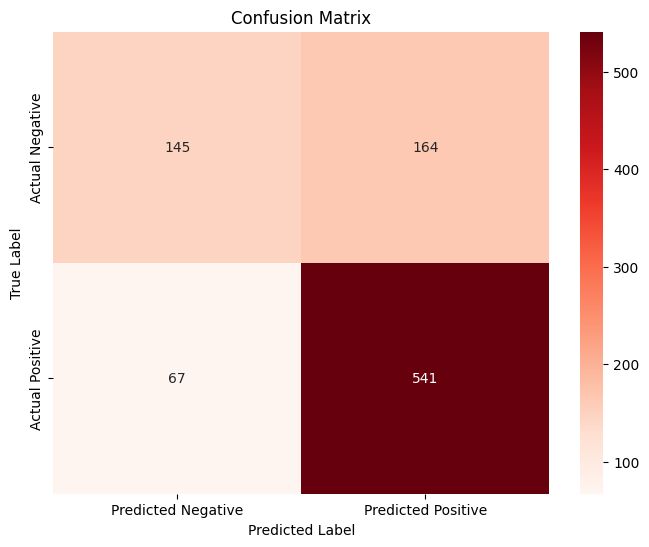

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = cnn_model1.predict(X_test_1)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test_1, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Experiment 2

In [ ]:
input_shape = (2000, 4)  # Example input shape
cnn_model2 = create_cnn_model(input_shape)
cnn_model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
acc_per_fold = []
X = concatenated_data_2
y = concatenated_labels_2
for train_idx, test_idx in kf.split(X):

    print(f"\nTraining on Fold {fold}")

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    cnn_model2 = create_cnn_model(input_shape)
    cnn_model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])
    cnn_model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    scores_2 = cnn_model2.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold} Accuracy: {scores_2[1]*100:.2f}%")
    acc_per_fold.append(scores_2[1])


Training on Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.7198 - loss: 0.5056 - precision_6: 0.8781 - recall_6: 0.5185
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 39s 244ms/step - accuracy: 0.7590 - loss: 0.4702 - precision_6: 1.0000 - recall_6: 0.5171
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 47s 282ms/step - accuracy: 0.7547 - loss: 0.4711 - precision_6: 1.0000 - recall_6: 0.5125
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 59s 139ms/step - accuracy: 0.7518 - loss: 0.4734 - precision_6: 1.0000 - recall_6: 0.5085
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.7469 - loss: 0.4821 - precision_6: 1.0000 - recall_6: 0.4867
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - accuracy: 0.7492 - loss: 0.4753 - precision_6: 1.0000 - recall_6: 0.5017
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.7393 - loss: 0.4895 - precision_6: 1.0000 - recall_6: 0.4736
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - accuracy: 0.7488 - loss: 0.4790 -

In [ ]:
#cnn_model2.fit(X_train_2, y_train_2, epochs=10, batch_size=32)

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 43s 244ms/step - accuracy: 0.9647 - loss: 0.0825 - precision_1: 0.9937 - recall_1: 0.9647
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 1.0000 - loss: 4.1083e-21 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 1.0000 - loss: 4.0875e-21 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 1.0000 - loss: 4.1040e-21 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 1.0000 - loss: 4.1085e-21 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 42s 144ms/step - accuracy: 1.0000 - loss: 4.1266e-21 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 1.0000 - loss: 4.1606e-21 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy:

In [ ]:
results = cnn_model2.evaluate(X_test_2, y_test_2)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7430 - loss: 0.4702 - precision_10: 1.0000 - recall_10: 0.4982


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


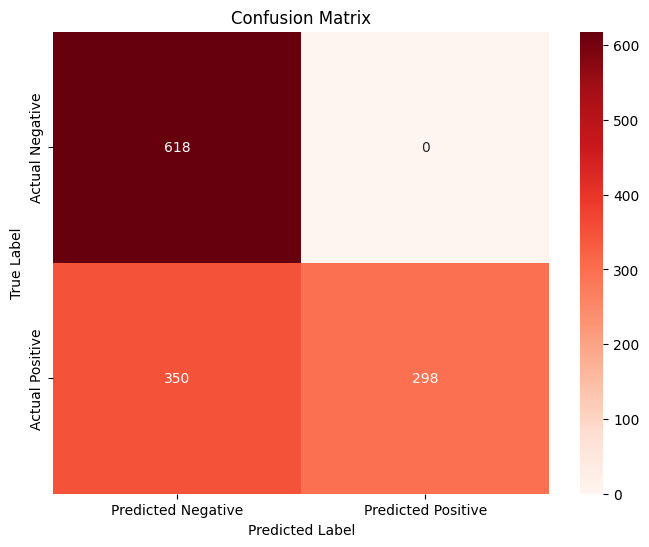

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = cnn_model2.predict(X_test_2)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test_2, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Experiment 3

In [ ]:
input_shape = (2000, 4)  # Example input shape
cnn_model3 = create_cnn_model(input_shape)
cnn_model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
acc_per_fold = []
X = concatenated_data_3
y = concatenated_labels_3
for train_idx, test_idx in kf.split(X):

    print(f"\nTraining on Fold {fold}")

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    cnn_model3= create_cnn_model(input_shape)
    cnn_model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
        tf.keras.metrics.Recall(),
     tf.keras.metrics.Precision()])
    cnn_model3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    scores_3 = cnn_model3.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold} Accuracy: {scores_3[1]*100:.2f}%")
    acc_per_fold.append(scores_3[1])


Training on Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.7846 - loss: 0.5214 - precision_11: 0.8164 - recall_11: 0.7155
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.9858 - loss: 0.0442 - precision_11: 0.9854 - recall_11: 0.9858
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.9849 - loss: 0.0377 - precision_11: 0.9865 - recall_11: 0.9824
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.9904 - loss: 0.0373 - precision_11: 0.9920 - recall_11: 0.9883
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.9986 - loss: 0.0069 - precision_11: 1.0000 - recall_11: 0.9972
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.9974 - loss: 0.0084 - precision_11: 1.0000 - recall_11: 0.9946
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 1.0000 - loss: 0.0010 - precision_11: 1.0000 - recall_11: 1.0000
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 1.0000 - loss: 5.2177e-04

In [ ]:
#cnn_model3.fit(X_train_3, y_train_3, epochs=10, batch_size=32)

In [ ]:
results = cnn_model3.evaluate(X_test_3, y_test_3)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 3.0279e-05 - precision_15: 1.0000 - recall_15: 1.0000


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


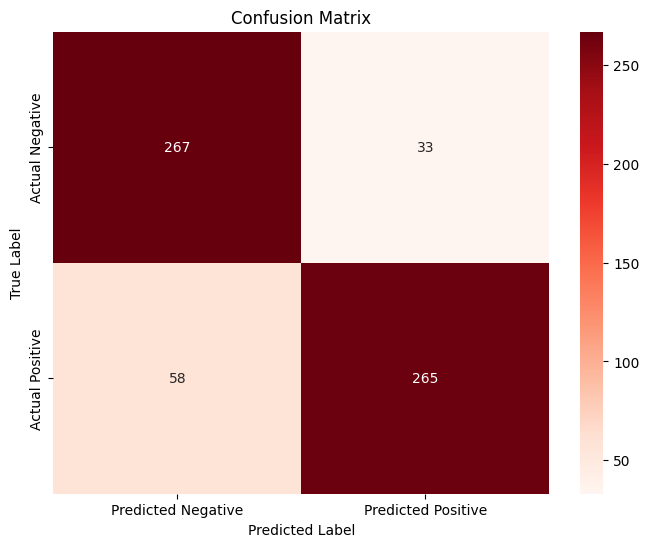

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = cnn_model3.predict(X_test_3)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test_3, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#Machine Learning

## Logistic Regression

### Experiment 1

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Reshape X_train_1 to have 2 dimensions
X_train_1_reshaped = X_train_1.reshape(X_train_1.shape[0], -1)

# Reshape X_test_1 to have 2 dimensions
X_test_1_reshaped = X_test_1.reshape(X_test_1.shape[0], -1)

# Now, you can use X_train_1_reshaped and X_test_1_reshaped with the LogisticRegression model
lg_model1 = LogisticRegressionCV(cv=5, random_state=42)
lg_model1.fit(X_train_1_reshaped, y_train_1)  # Use the reshaped data here
y_pred_1 = lg_model1.predict(X_test_1_reshaped)  # Use the reshaped data here
accuracy = accuracy_score(y_test_1, y_pred_1)
print("Accuracy:", accuracy)


Accuracy: 0.7404580152671756


###Experiment 2

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Reshape X_train_2 to have 2 dimensions
X_train_2_reshaped = X_train_2.reshape(X_train_2.shape[0], -1)

# Reshape X_test_2 to have 2 dimensions
X_test_2_reshaped = X_test_2.reshape(X_test_2.shape[0], -1)

# Now, you can use X_train_2_reshaped and X_test_2_reshaped with the LogisticRegression model
lg_model2 = LogisticRegressionCV(cv=5, random_state=42)
lg_model2.fit(X_train_2_reshaped, y_train_2)  # Use the reshaped data here
y_pred_2 = lg_model2.predict(X_test_2_reshaped)  # Use the reshaped data here
accuracy = accuracy_score(y_test_2, y_pred_2)
print("Accuracy:", accuracy)

Accuracy: 0.7227488151658767


###Experiment 3

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Reshape X_train_3 to have 3 dimensions
X_train_3_reshaped = X_train_3.reshape(X_train_3.shape[0], -1)

# Reshape X_test_3 to have 3 dimensions
X_test_3_reshaped = X_test_3.reshape(X_test_3.shape[0], -1)

# Now, you can use X_train_3_reshaped and X_test_3_reshaped with the LogisticRegression model
lg_model3 = LogisticRegressionCV(cv=5, random_state=43)
lg_model3.fit(X_train_3_reshaped, y_train_3)  # Use the reshaped data here
y_pred_3 = lg_model3.predict(X_test_3_reshaped)  # Use the reshaped data here
accuracy = accuracy_score(y_test_3, y_pred_3)
print("Accuracy:", accuracy)

Accuracy: 0.9678972712680578


# Compare Results

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


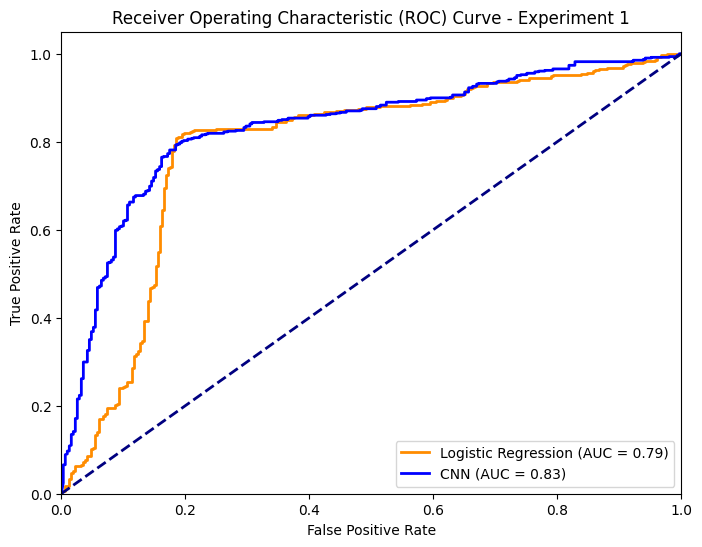

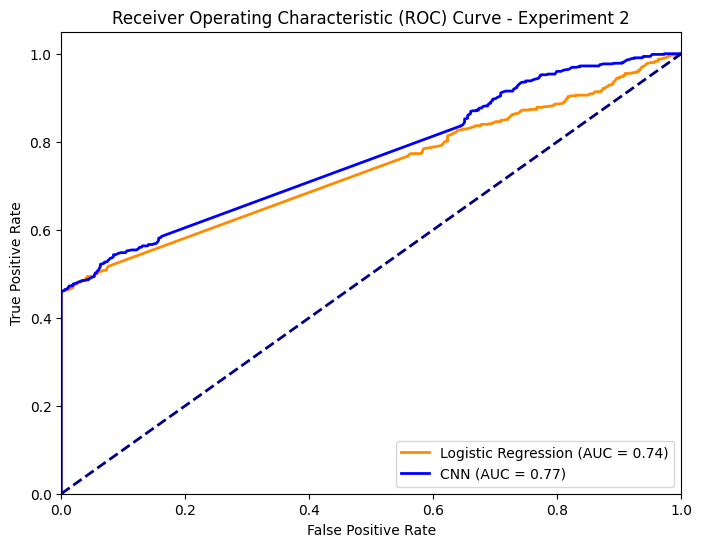

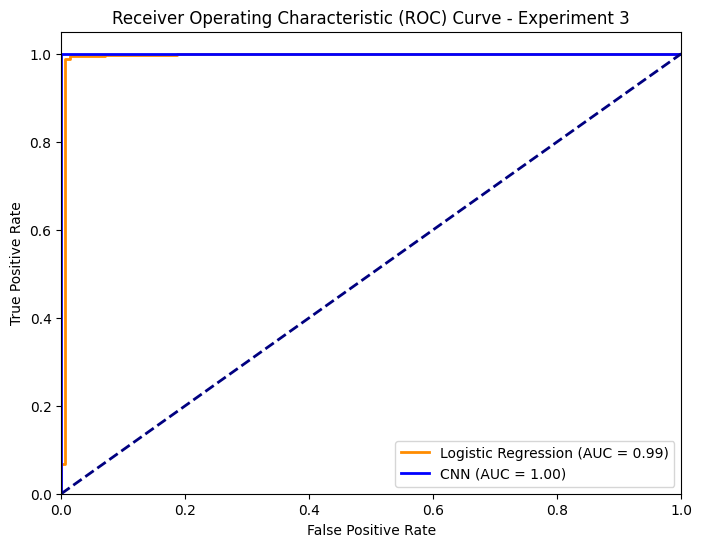

In [ ]:
# prompt: make a roc_curve graph from the logistic regression and cnn results

from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC Curve (Experiment 1)
y_prob_lr1 = lg_model1.predict_proba(X_test_1_reshaped)[:, 1]
fpr_lr1, tpr_lr1, thresholds_lr1 = roc_curve(y_test_1, y_prob_lr1)
roc_auc_lr1 = auc(fpr_lr1, tpr_lr1)

# CNN ROC Curve (Experiment 1)
y_prob_cnn1 = cnn_model1.predict(X_test_1)
fpr_cnn1, tpr_cnn1, thresholds_cnn1 = roc_curve(y_test_1, y_prob_cnn1)
roc_auc_cnn1 = auc(fpr_cnn1, tpr_cnn1)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr1, tpr_lr1, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr1:.2f})')
plt.plot(fpr_cnn1, tpr_cnn1, color='blue', lw=2, label=f'CNN (AUC = {roc_auc_cnn1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Experiment 1')
plt.legend(loc="lower right")

#plt.show()


# Repeat for Experiment 2 and 3 (replace placeholders with actual model and data)

# Logistic Regression ROC Curve (Experiment 2)
y_prob_lr2 = lg_model2.predict_proba(X_test_2_reshaped)[:, 1]
fpr_lr2, tpr_lr2, thresholds_lr2 = roc_curve(y_test_2, y_prob_lr2)
roc_auc_lr2 = auc(fpr_lr2, tpr_lr2)

# CNN ROC Curve (Experiment 2)
y_prob_cnn2 = cnn_model2.predict(X_test_2)
fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(y_test_2, y_prob_cnn2)
roc_auc_cnn2 = auc(fpr_cnn2, tpr_cnn2)

# Plot ROC curves - Experiment 2
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr2, tpr_lr2, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr2:.2f})')
plt.plot(fpr_cnn2, tpr_cnn2, color='blue', lw=2, label=f'CNN (AUC = {roc_auc_cnn2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Experiment 2')
plt.legend(loc="lower right")
#plt.show()


# Logistic Regression ROC Curve (Experiment 3)
y_prob_lr3 = lg_model3.predict_proba(X_test_3_reshaped)[:, 1]
fpr_lr3, tpr_lr3, thresholds_lr3 = roc_curve(y_test_3, y_prob_lr3)
roc_auc_lr3 = auc(fpr_lr3, tpr_lr3)

# CNN ROC Curve (Experiment 3)
y_prob_cnn3 = cnn_model3.predict(X_test_3)
fpr_cnn3, tpr_cnn3, thresholds_cnn3 = roc_curve(y_test_3, y_prob_cnn3)
roc_auc_cnn3 = auc(fpr_cnn3, tpr_cnn3)

# Plot ROC curves - Experiment 3
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr3, tpr_lr3, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr3:.2f})')
plt.plot(fpr_cnn3, tpr_cnn3, color='blue', lw=2, label=f'CNN (AUC = {roc_auc_cnn3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Experiment 3')
plt.legend(loc="lower right")
plt.show()
